In [1]:
import time
import pandas as pd
from IPython.display import display_html
from matplotlib import pyplot as plt

## load image

In [2]:
import numpy as np
import os
import PIL
from PIL import Image, ImageOps
PIL.Image.MAX_IMAGE_PIXELS = 933120000

cached_img_load = {}

def get_files(name,path):
    if not os.path.isdir(path):
        return [(name,path)]
    else:
        targets = [
            f for f in os.listdir(path) if not os.path.isdir(os.path.join(path, f))
        ]
        return [
            (name + '/' + f, os.path.join(path, f)) for f in targets
        ]

def load_image(name,path):
    try:
        image = Image.open(path)
        # https://stackoverflow.com/questions/63947990/why-are-width-and-height-of-an-image-are-inverted-when-loading-using-pil-versus
        image = ImageOps.exif_transpose(image)

        img = np.array(image.convert('RGB'))
        dpi = image.info.get("dpi")

        print("name: ", name, 'dpi:', dpi)

        cached_img_load[name] = (img,dpi)
    except Exception as e:
        print("skip: ", path)

In [3]:
files = get_files("images", os.path.abspath("../images/projection-score"))
for n,f in files:
    load_image(n,f)

name:  images/sample1.jpg dpi: None
name:  images/sample2.jpg dpi: None
name:  images/skewed_text.jpg dpi: (96, 96)


## preprocess image

name:  images/sample1.jpg time:  0.003001 seconds
name:  images/sample2.jpg time:  0.000992 seconds
name:  images/skewed_text.jpg time:  0.000000 seconds


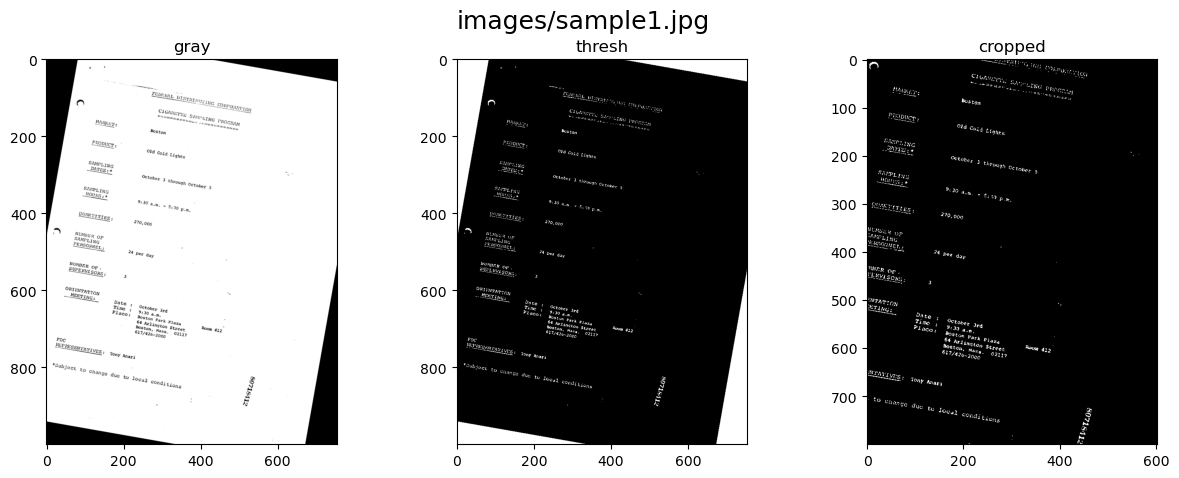

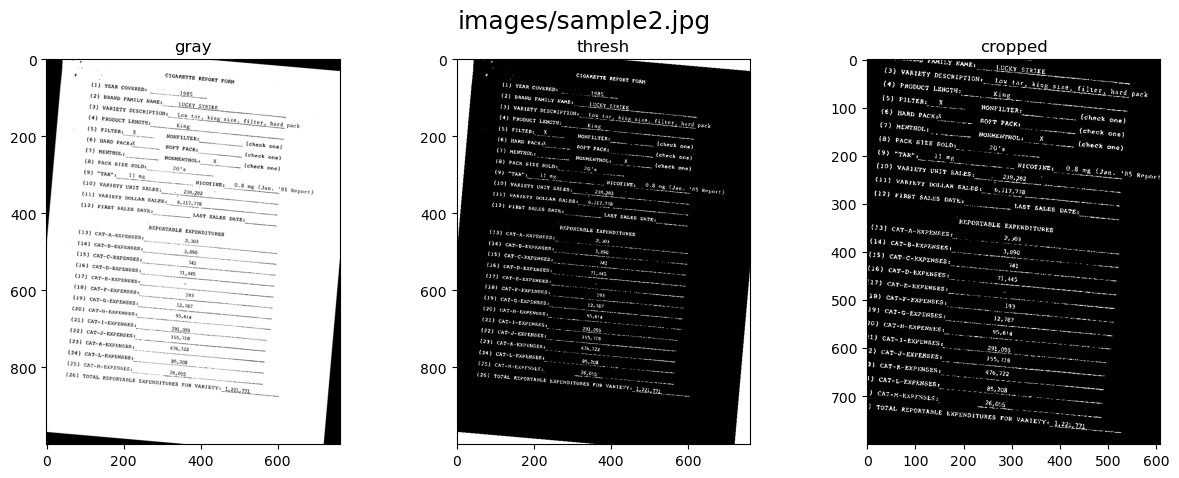

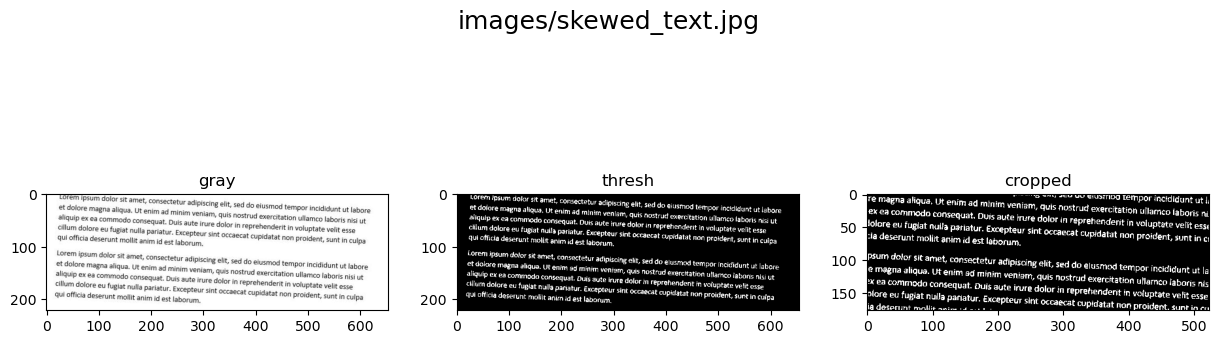

In [4]:
import cv2

cached_img_preprocess = {}

for name,(img,_) in cached_img_load.items():
    start = time.time()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # invert black
    thresh = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # trim the border to prevent interference

    height,width = img.shape[:2]
    # Define the cutting ratio to be retained.
    left_ratio = 0.1
    right_ratio = 0.1
    top_ratio = 0.1
    bottom_ratio = 0.1

    left = int(width * left_ratio)
    right = int(width * (1 - right_ratio))
    top = int(height * top_ratio)
    bottom = int(height * (1 - bottom_ratio))

    cropped = thresh[top:bottom, left:right]

    end = time.time()
    cached_img_preprocess[name] = cropped


    print("name: ", name, "time: ", "{:.6f} seconds".format(end - start))

    # show the output image
    show_imgs = [
        ("gray", gray),
        ("thresh", thresh),
        ("cropped", cropped)
    ]
    show_count = len(show_imgs)
    fig = plt.figure(figsize=(show_count * 5,5))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(1,show_count)
    for idx, (name,img) in enumerate(show_imgs):
        if img is None: continue
        ax = fig.add_subplot(gs[0, idx])
        ax.set_title(name)
        ax.imshow(img, cmap='gray')

## projection angle

name:  images/sample1.jpg time: 0.030004 seconds


,angles,counts,classified
0,0,665,normal
1,5,524,normal
2,10,358,best
3,15,518,normal
4,20,658,normal
5,25,709,normal
6,30,680,normal
7,35,715,normal
8,40,748,normal
9,45,737,normal


name:  images/sample2.jpg time: 0.028000 seconds


,angles,counts,classified
0,0,775,normal
1,5,518,best
2,10,765,normal
3,15,795,normal
4,20,800,normal
5,25,800,normal
6,30,800,normal
7,35,800,normal
8,40,800,normal
9,45,800,normal


name:  images/skewed_text.jpg time: 0.016002 seconds


,angles,counts,classified
0,0,166,best
1,5,177,normal
2,10,177,normal
3,15,177,normal
4,20,177,normal
5,25,177,normal
6,30,177,normal
7,35,177,normal
8,40,177,normal
9,45,177,normal


,angle
images/sample1.jpg,9.7
images/sample2.jpg,5.5
images/skewed_text.jpg,2.6


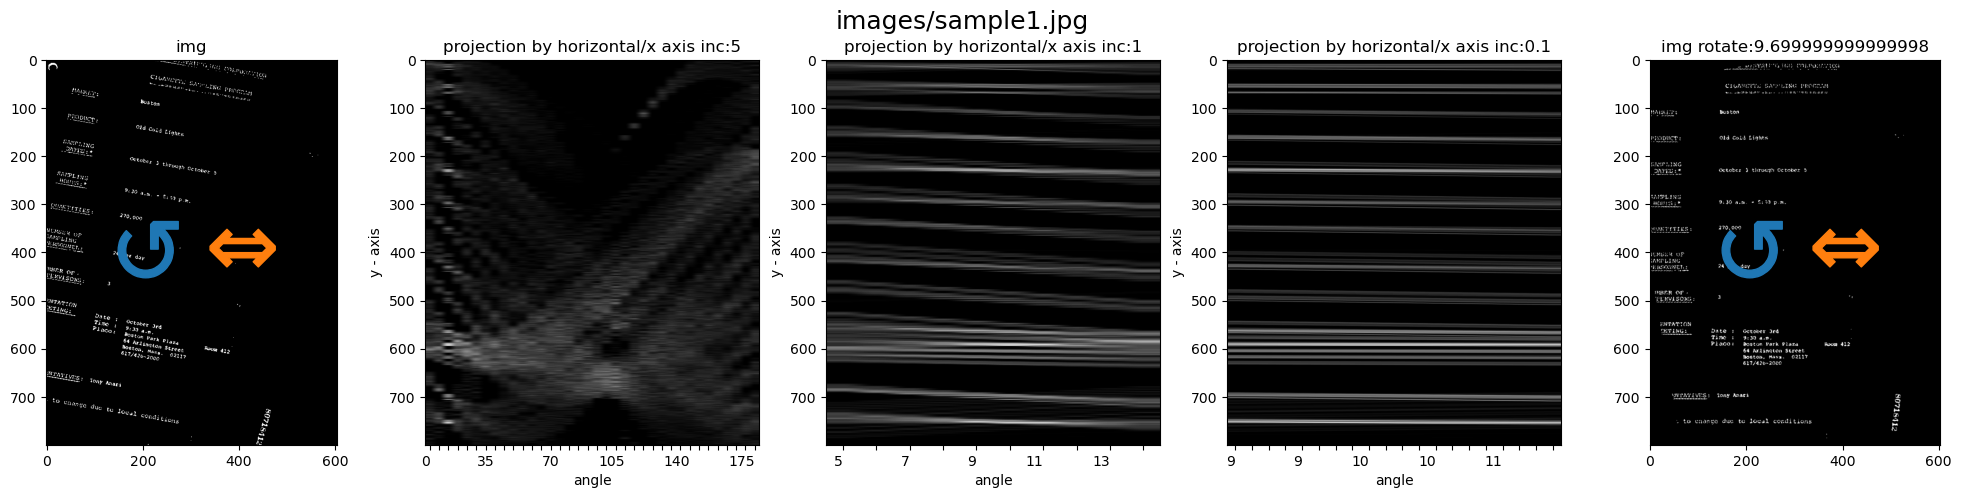

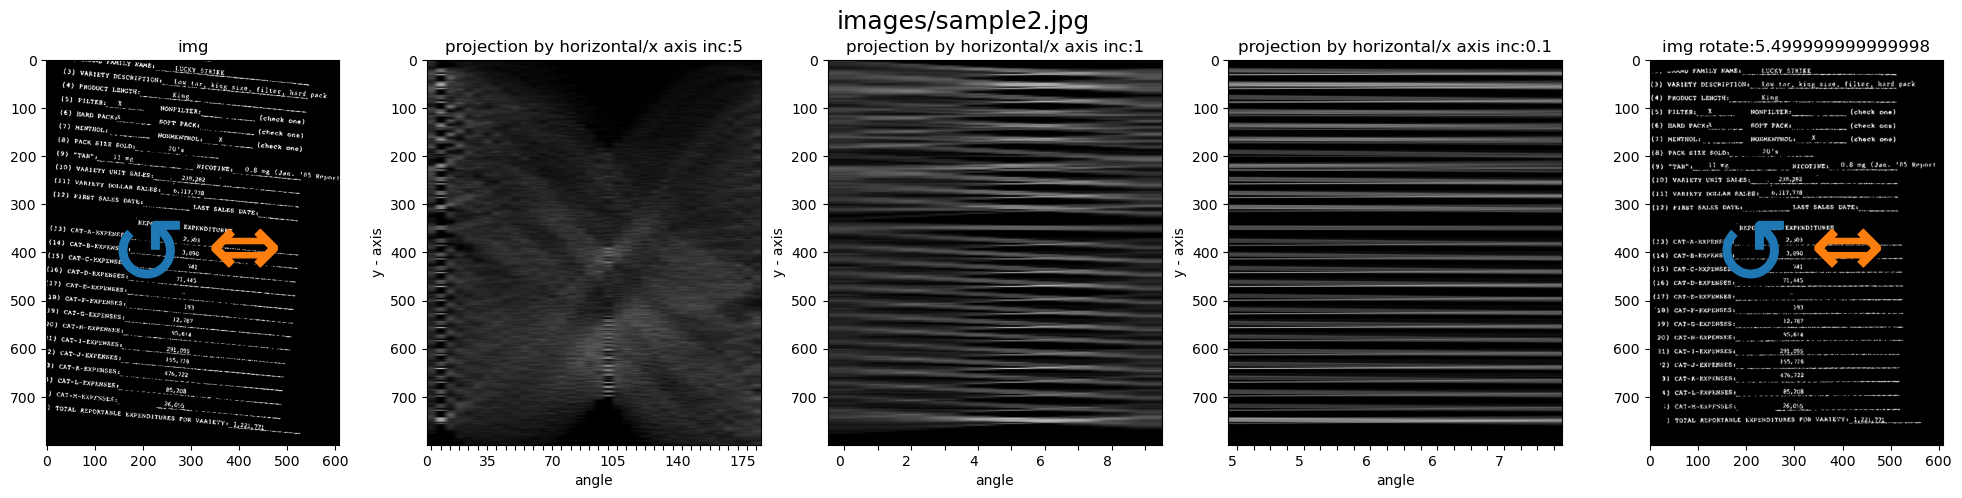

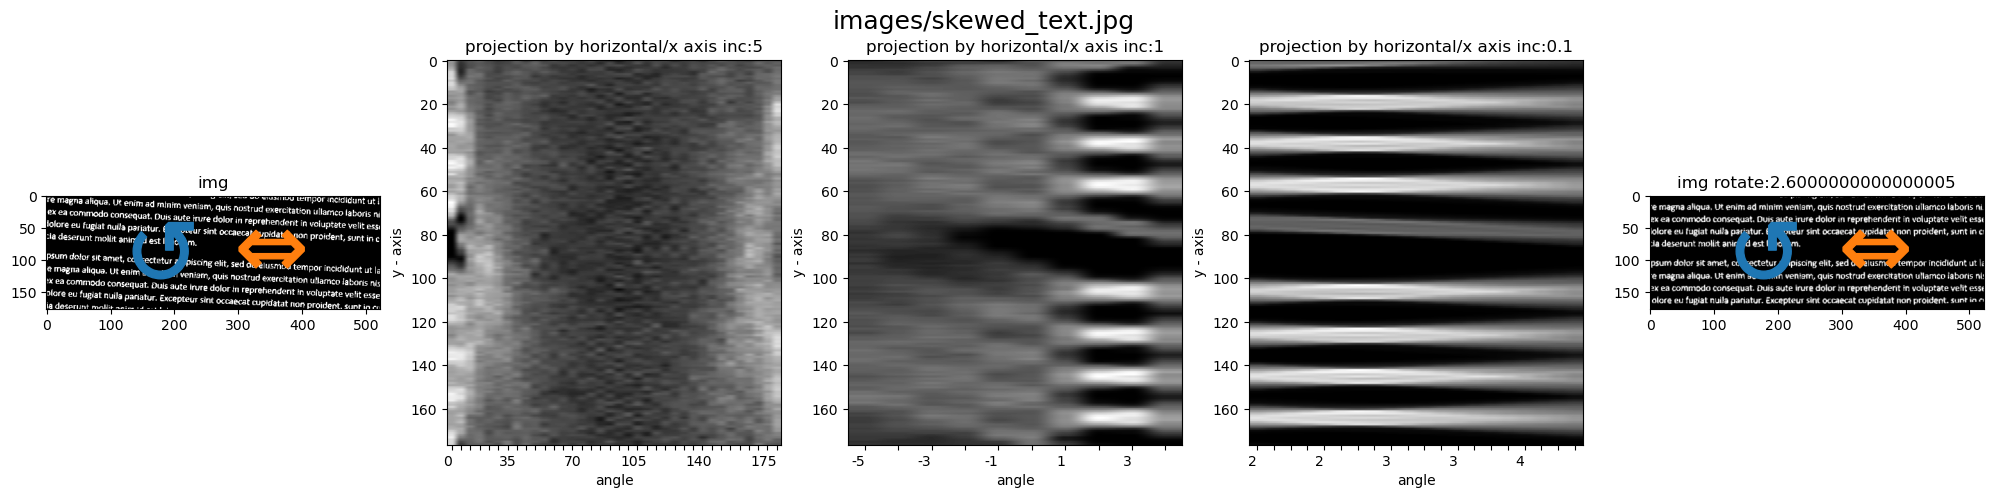

In [5]:
def rotate(img, angle):
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    dst = cv2.warpAffine(img, M, (cols, rows))
    return dst

def projection(img, vert, start_angle, end_angle, incr=0.5):
    length = img.shape[0]
    axis = 1
    if vert:
        axis = 0
        length = img.shape[1]

    angles = np.arange(start_angle, end_angle, incr)

    spaces = np.zeros((len(angles), length))
    for idx,deg in enumerate(angles):
        img_rotated = rotate(img, deg)
        axis_sums = np.sum(img_rotated, axis=axis)
        spaces[idx] = axis_sums

    return spaces,angles

def best(spaces, angles):
    min_score = spaces.shape[1]

    for idx,angle in enumerate(angles):
        axis_sums = spaces[idx]

        score = np.count_nonzero(axis_sums)
        if score < min_score:
            min_score = score
            best_angle = idx
    
    return best_angle

cached_projection_angle = {}

for name,img in cached_img_preprocess.items():
    start = time.time()

    vert = False
    start_angle = 0
    end_angle = 180

    step_results = []

    incr_steps = [5, 1, 0.1]
    for inc in incr_steps:
        spaces, angles = projection(img, vert, start_angle, end_angle, incr=inc)
        
        idx = best(spaces, angles)

        step_results.append((inc, spaces, angles, idx))

        best_angle = angles[idx]
        # next step angle
        start_angle = best_angle - inc
        end_angle = best_angle + inc

    end = time.time()
    cached_projection_angle[name] = (best_angle)


    print("name: ", name, "time:", "{:.6f} seconds".format(end - start))

    html = ''
    for step in step_results:
        (inc, spaces, angles, idx) = step
        counts = np.count_nonzero(spaces, axis=1)
        classified = np.full(len(angles), 'normal', dtype=object)
        classified[idx] = 'best'
        df = pd.DataFrame.from_dict({
            'angles': angles,
            'counts': counts,
            'classified': classified
        })
        df_styler = df.style.set_table_attributes("style='display:inline'").set_caption(f"incr by {inc}")
        html = html + df_styler._repr_html_()
    display_html(html, raw=True)

    row_count = 1
    col_count = len(step_results) + 2

    fig = plt.figure(figsize=(col_count * 5, row_count * 5))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(row_count,col_count)

    ax = fig.add_subplot(gs[0,0])
    ax.set_title(f"img")
    ax.imshow(img, cmap="gray")
    ax.plot(img.shape[1] * 1/3, img.shape[0] / 2, marker=r'$\circlearrowleft$', ms=50)
    ax.plot(img.shape[1] * 2/3, img.shape[0] / 2, marker=r'$\Leftrightarrow$', ms=50)

    for step_idx, step in enumerate(step_results):
        (inc, spaces, angles, idx) = step

        ax = fig.add_subplot(gs[0,step_idx + 1])
        ax.set_title(f"projection by horizontal/x axis inc:{inc}")
        ax.set_ylabel("y - axis")
        ax.set_xlabel("angle")
        ax.imshow(spaces.T, cmap="gray", aspect='auto')

        ax.set_xticks(np.arange(len(angles)))
        visible_count = len(angles) // 5
        visible_labels = [f'{angle:.0f}' if i % visible_count == 0 else '' for i, angle in enumerate(angles)]
        ax.set_xticklabels(visible_labels, ha='right')

    ax = fig.add_subplot(gs[0,col_count - 1])
    ax.set_title(f"img rotate:{best_angle}")
    ax.imshow(rotate(img,best_angle), cmap="gray")
    ax.plot(img.shape[1] * 1/3, img.shape[0] / 2, marker=r'$\circlearrowleft$', ms=50)
    ax.plot(img.shape[1] * 2/3, img.shape[0] / 2, marker=r'$\Leftrightarrow$', ms=50)


df = pd.DataFrame.from_dict(cached_projection_angle, orient='index', columns=['angle'])
display(df)

## deskew image

name:  images/sample1.jpg time:  0.001001 seconds
name:  images/sample2.jpg time:  0.001998 seconds
name:  images/skewed_text.jpg time:  0.000000 seconds


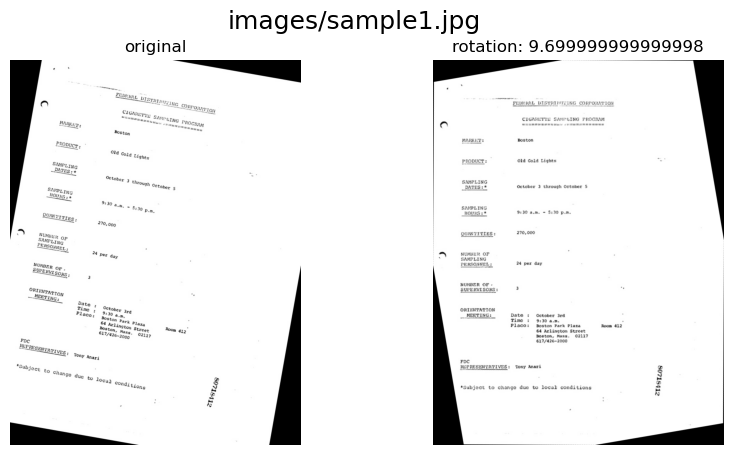

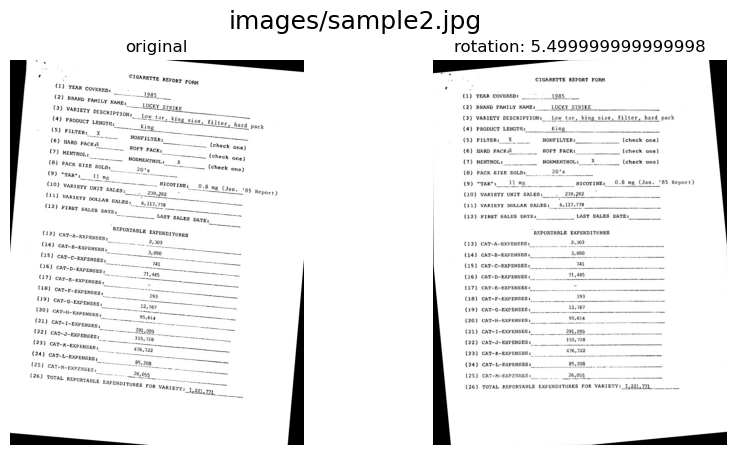

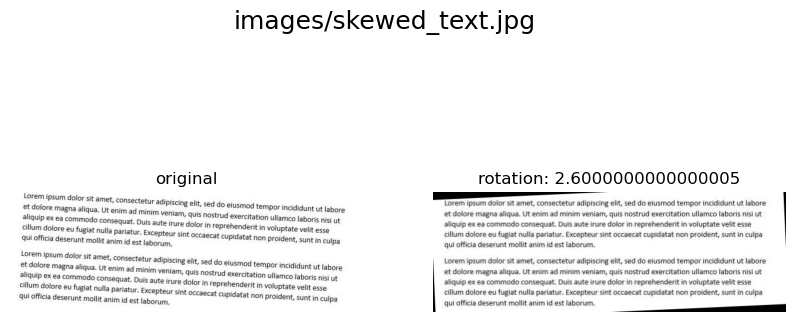

In [6]:
for name,(angle_deg) in cached_projection_angle.items():
    start = time.time()

    img,_ = cached_img_load[name]
    rotation_deg = angle_deg

    # Rotate original image
    img_center = tuple(np.array(img.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(img_center, rotation_deg, 1.0)
    img_rotated = cv2.warpAffine(img, rotation_matrix, img.shape[1::-1], flags=cv2.INTER_LINEAR)

    end = time.time()


    print("name: ", name, "time: ", "{:.6f} seconds".format(end - start))

    # show the output image
    imgs_show = [
        ("original", img),
        (f"rotation: {rotation_deg}", img_rotated)
    ]
    fig = plt.figure(figsize=(10,5))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(1,len(imgs_show))
    for idx, (name,img) in enumerate(imgs_show):
        ax = fig.add_subplot(gs[0, idx])
        ax.set_title(name)
        ax.axis('off')
        ax.imshow(img)
